# Import Dependencies

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [8]:
train = pd.read_csv('train.csv')

In [16]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

In [74]:
features = train.drop(['PassengerId','Name','Ticket'],axis=1)

<Axes: xlabel='Age', ylabel='Count'>

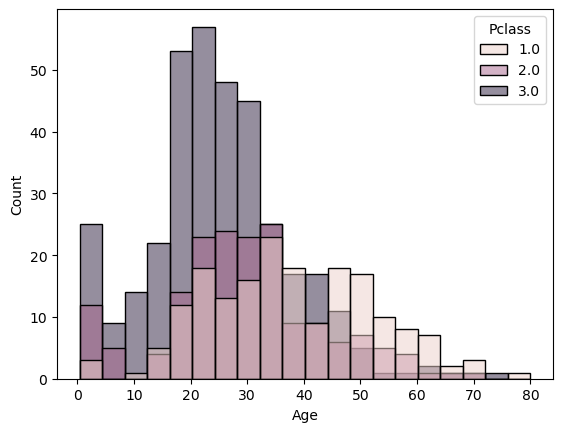

In [90]:
sns.histplot(data=features, x='Age', hue='Pclass')

<Axes: ylabel='Age'>

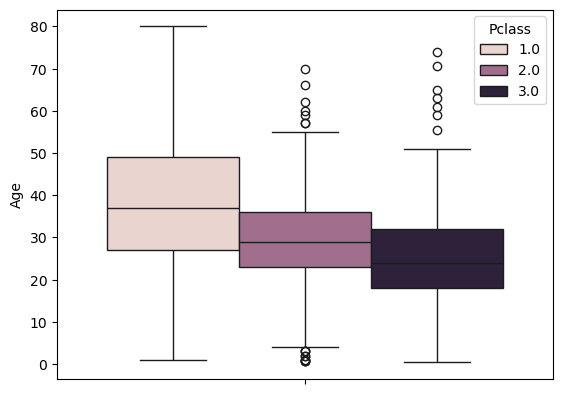

In [92]:
sns.boxplot(data=features,y='Age',hue='Pclass')

<Axes: >

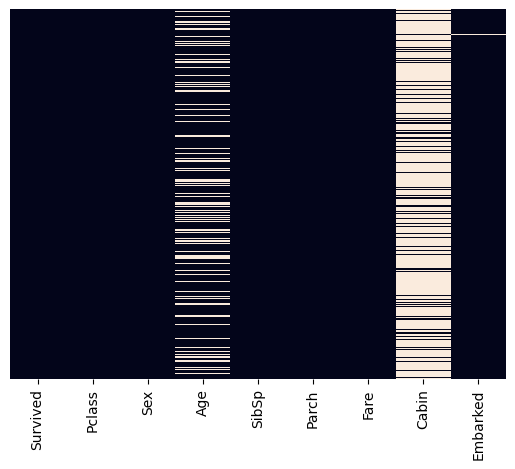

In [49]:
sns.heatmap(data=features.isnull(), cbar=False, yticklabels=False)

In [75]:
features[features['Embarked'].apply(pd.isna) == True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


# Preprocessing

In [76]:
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Drop rows where 'Embarked' = NaN

In [77]:
# Drop rows where Embarked = NaN
features.dropna(subset=['Embarked'],inplace=True)

In [78]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


## One Hot Encoding for 'Sex' and 'Embarked'

In [79]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

In [80]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoded_data = encoder.fit_transform(features[['Sex','Embarked']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Sex','Embarked']))

In [81]:
encoded_df.head()

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0


In [82]:
features=pd.concat([features,encoded_df],axis=1)

In [85]:
features.drop(['Sex','Embarked'],inplace=True, axis=1)

In [86]:
features.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,NaN,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,C85,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,NaN,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,C123,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,NaN,1.0,0.0,1.0


## Simple Imputation for 'Age'

In [93]:
from sklearn.impute import KNNImputer

In [96]:
imputer = KNNImputer(n_neighbors=2)
features_imputed = imputer.fit_transform(features.drop(['Cabin'], axis=1))

In [101]:
features_imputed = pd.DataFrame(features_imputed, columns=features.drop(['Cabin'],axis=1).columns)

In [104]:
# Add back the 'Cabin' column
features = pd.concat([features_imputed, features['Cabin']],axis=1)

In [106]:
features.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,NaN
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,C85
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,NaN
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,C123
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,NaN


<Axes: >

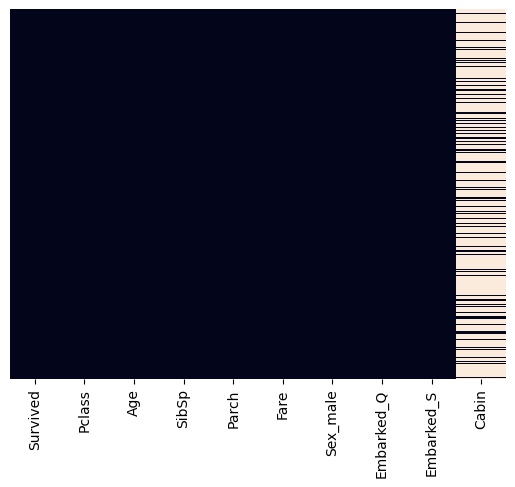

In [108]:
sns.heatmap(features.isnull(),yticklabels=False, cbar=False)

# Train Logistic Regression Model

In [109]:
features.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,NaN
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,C85
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,NaN
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,C123
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,NaN


In [110]:
from sklearn.model_selection import train_test_split

In [124]:
X = features.drop(['Survived','Cabin'],axis=1)
y = features['Survived']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
from sklearn.linear_model import LogisticRegression

In [131]:
model = LogisticRegression(max_iter=200)

In [132]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [133]:
y_pred = model.predict(X_test)

# Evaluate Logistic Regression Model

In [134]:
from sklearn.metrics import auc, classification_report

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.84      0.73       146
         1.0       0.70      0.43      0.54       122

    accuracy                           0.66       268
   macro avg       0.67      0.64      0.63       268
weighted avg       0.67      0.66      0.64       268

